In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv('TrainingSet.csv')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75007 entries, 0 to 75006
Data columns (total 39 columns):
row ID               75007 non-null int64
SSL                  75007 non-null object
BATHRM               74986 non-null float64
HF_BATHRM            74985 non-null float64
HEAT                 74986 non-null float64
HEAT_D               74986 non-null object
AC                   74986 non-null object
NUM_UNITS            74986 non-null float64
ROOMS                74977 non-null float64
BEDRM                74984 non-null float64
AYB                  74996 non-null float64
YR_RMDL              34636 non-null float64
EYB                  75007 non-null int64
STORIES              74947 non-null float64
SALEDATE             75007 non-null object
PRICE                61396 non-null float64
QUALIFIED            75007 non-null int64
SALE_NUM             75007 non-null int64
GBA                  75007 non-null int64
BLDG_NUM             75007 non-null int64
STYLE                74986 

In [3]:
train_data.describe()

,row ID,BATHRM,HF_BATHRM,HEAT,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA
count,75007.000000,74986.000000,74985.000000,74986.000000,74986.000000,74977.000000,74984.000000,74996.000000,34636.000000,75007.000000,...,74986.000000,74986.000000,74986.000000,74986.000000,74986.000000,74986.000000,74986.000000,74985.000000,75007.000000,75007.000000
mean,53550.270708,2.034766,0.608775,7.654362,1.199104,7.366766,3.375320,1930.052589,2000.976903,1965.637221,...,4.999947,4.266436,3.525178,13.352279,3.987464,6.140266,1.220641,0.621004,13.149586,3425.291413
std,30915.423208,1.071893,0.616843,5.040268,0.597179,2.354378,1.154972,90.606712,14.949344,36.735057,...,2.877050,1.367781,0.717112,3.923548,3.349309,1.951204,0.627146,0.896387,5.369147,5565.759205
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1880.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26770.000000,1.000000,0.000000,1.000000,1.000000,6.000000,3.000000,1914.000000,1992.000000,1955.000000,...,1.000000,3.000000,3.000000,14.000000,1.000000,6.000000,1.000000,0.000000,11.000000,1599.000000
50%,53518.000000,2.000000,1.000000,7.000000,1.000000,7.000000,3.000000,1930.000000,2006.000000,1964.000000,...,7.000000,4.000000,3.000000,14.000000,2.000000,6.000000,1.000000,0.000000,12.000000,2369.000000
75%,80346.500000,3.000000,1.000000,13.000000,1.000000,8.000000,4.000000,1947.000000,2011.000000,1970.000000,...,7.000000,5.000000,4.000000,14.000000,6.000000,6.000000,1.000000,1.000000,13.000000,4218.000000
max,107154.000000,24.000000,11.000000,13.000000,6.000000,101.000000,53.000000,2019.000000,2019.000000,2018.000000,...,13.000000,12.000000,6.000000,24.000000,15.000000,11.000000,44.000000,13.000000,995.000000,691817.000000


In [ ]:
## feature engineering

In [5]:
train = train_data.drop(train_data.filter(regex='row ID|SSL|._D$|GIS_LAST_MOD_DTTM|SALEDATE'), axis=1)
## too much missing values 
train = train.drop(['YR_RMDL'], axis= 1)

In [ ]:
pd.options.display.max_columns = 100

In [6]:
train.describe()

,BATHRM,HF_BATHRM,HEAT,NUM_UNITS,ROOMS,BEDRM,AYB,EYB,STORIES,PRICE,...,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA
count,74986.000000,74985.000000,74986.000000,74986.000000,74977.000000,74984.000000,74996.000000,75007.000000,74947.000000,6.139600e+04,...,74986.000000,74986.000000,74986.000000,74986.000000,74986.000000,74986.000000,74986.000000,74985.000000,75007.000000,75007.000000
mean,2.034766,0.608775,7.654362,1.199104,7.366766,3.375320,1930.052589,1965.637221,2.096858,3.843039e+05,...,4.999947,4.266436,3.525178,13.352279,3.987464,6.140266,1.220641,0.621004,13.149586,3425.291413
std,1.071893,0.616843,5.040268,0.597179,2.354378,1.154972,90.606712,36.735057,3.477009,5.608747e+05,...,2.877050,1.367781,0.717112,3.923548,3.349309,1.951204,0.627146,0.896387,5.369147,5565.759205
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,6.000000,3.000000,1914.000000,1955.000000,2.000000,0.000000e+00,...,1.000000,3.000000,3.000000,14.000000,1.000000,6.000000,1.000000,0.000000,11.000000,1599.000000
50%,2.000000,1.000000,7.000000,1.000000,7.000000,3.000000,1930.000000,1964.000000,2.000000,2.365000e+05,...,7.000000,4.000000,3.000000,14.000000,2.000000,6.000000,1.000000,0.000000,12.000000,2369.000000
75%,3.000000,1.000000,13.000000,1.000000,8.000000,4.000000,1947.000000,1970.000000,2.000000,5.850000e+05,...,7.000000,5.000000,4.000000,14.000000,6.000000,6.000000,1.000000,1.000000,13.000000,4218.000000
max,24.000000,11.000000,13.000000,6.000000,101.000000,53.000000,2019.000000,2018.000000,826.000000,2.510000e+07,...,13.000000,12.000000,6.000000,24.000000,15.000000,11.000000,44.000000,13.000000,995.000000,691817.000000


In [7]:
train.dtypes

BATHRM        float64
HF_BATHRM     float64
HEAT          float64
AC             object
NUM_UNITS     float64
ROOMS         float64
BEDRM         float64
AYB           float64
EYB             int64
STORIES       float64
PRICE         float64
QUALIFIED       int64
SALE_NUM        int64
GBA             int64
BLDG_NUM        int64
STYLE         float64
STRUCT        float64
GRADE         float64
CNDTN         float64
EXTWALL       float64
ROOF          float64
INTWALL       float64
KITCHENS      float64
FIREPLACES    float64
USECODE         int64
LANDAREA        int64
dtype: object

In [ ]:
## scales GBA, LANDAREA because Standard Deviation is too high so scaling is necessary 
from sklearn.preprocessing import StandardScaler
scales = StandardScaler()
GBA_Values = train['GBA'].values
GBA_re = GBA_Values.reshape(-1,1)
GBA_scale_param = scales.fit(GBA_re)
train['GBA_scales'] = scales.fit_transform(GBA_re,GBA_scale_param)

LANDAREA_Values = train['LANDAREA'].values
LANDAREA_re = LANDAREA_Values.reshape(-1,1)
LANDAREA_scale_param = scales.fit(LANDAREA_re)
train['LANDAREA_scales'] = scales.fit_transform(LANDAREA_re,LANDAREA_scale_param)
train = train.drop(['GBA','LANDAREA'], axis=1 )

In [8]:
train.isnull().sum()

BATHRM           21
HF_BATHRM        22
HEAT             21
AC               21
NUM_UNITS        21
ROOMS            30
BEDRM            23
AYB              11
EYB               0
STORIES          60
PRICE         13611
QUALIFIED         0
SALE_NUM          0
GBA               0
BLDG_NUM          0
STYLE            21
STRUCT           21
GRADE            21
CNDTN            21
EXTWALL          21
ROOF             21
INTWALL          21
KITCHENS         21
FIREPLACES       22
USECODE           0
LANDAREA          0
dtype: int64

In [ ]:
train = train.dropna(thresh = 10) #  drop the rows don't contains at least have 10 values
train[['HF_BATHRM','ROOMS','BEDRM','AYB','STORIES','FIREPLACES']]= \  ##filling missing values with median
train[['HF_BATHRM','ROOMS','BEDRM','AYB','STORIES','FIREPLACES']].fillna(train.median()) 
from sklearn.ensemble import RandomForestRegressor ##filling PRICE missing values
def set_missing_PRICE_values(df): 
    PRICE_df = df[['PRICE','BATHRM','HF_BATHRM','HEAT','NUM_UNITS','ROOMS','BEDRM','AYB','EYB','STORIES','SALE_NUM','SALE_NUM','GBA_scales','BLDG_NUM','STYLE','STRUCT','GRADE','CNDTN','EXTWALL','ROOF','INTWALL','KITCHENS','FIREPLACES','USECODE','LANDAREA_scales']] ##put into all numeric values 
    PRICE_df_know = PRICE_df[PRICE_df.PRICE.notnull()].values
    PRICE_df_unknow = PRICE_df[PRICE_df.PRICE.isnull()].values
    y = PRICE_df_know[:,0]
    X = PRICE_df_know[:,1:]
    rfr = RandomForestRegressor(random_state=0, n_jobs=-1)
    rfr.fit(X, y)
    predictedPRICE = rfr.predict(PRICE_df_unknow[:,1:])  
    PRICE_df.loc[(PRICE_df.PRICE.isnull()),'PRICE'] = predictedPRICE
    return PRICE_df,rfr

In [ ]:
PRICE_df,rfr = set_missing_PRICE_values(train)

In [ ]:
## binary
def set_binary(df):
    dummies_AC = pd.get_dummies(df['AC'], prefix='AC')
    return dummies_AC

In [ ]:
binary_AC = set_binary(train)

In [16]:
Train_final = pd.concat([PRICE_df, binary_AC, train['QUALIFIED']], axis=1)

Text(0,0.5,'Cross-validation Accuracy')

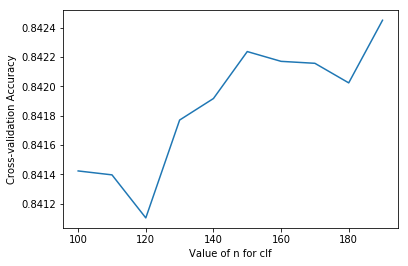

In [21]:
## build estimators
y  = Train_final['QUALIFIED'].values.reshape(-1,1)
X = Train_final.drop(['QUALIFIED'],axis= 1).values
## cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
n_range = range(100,200,10)
n_scores = []
y_m = Train_final['QUALIFIED']
for n in n_range:
    clf = RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=n)
    scores = cross_val_score(clf,X,y_m,cv=5,scoring='accuracy')
    n_scores.append(scores.mean())
##n_estimators and accuracy 
plt.plot(n_range, n_scores)
plt.xlabel('Value of n for clf')
plt.ylabel('Cross-validation Accuracy')

In [45]:
clf = RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=150)
clf.fit(X,y)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [ ]:
##prediction

In [22]:
test_data = pd.read_csv('TestingSet.csv')


In [23]:
## data preprocessing
test = test_data.drop(train_data.filter(regex='SSL|._D$|GIS_LAST_MOD_DTTM|SALEDATE'), axis=1)
## too much missing values 
test = test.drop(['YR_RMDL'], axis= 1)

In [24]:
test.isnull().sum()  ## test dataset also need data preprocessing 

row ID           0
BATHRM           6
HF_BATHRM        6
HEAT             6
AC               6
NUM_UNITS        6
ROOMS           14
BEDRM            8
AYB              2
EYB              0
STORIES         14
PRICE         5677
SALE_NUM         0
GBA              0
BLDG_NUM         0
STYLE            6
STRUCT           6
GRADE            6
CNDTN            6
EXTWALL          6
ROOF             6
INTWALL          6
KITCHENS         7
FIREPLACES       6
USECODE          0
LANDAREA         0
dtype: int64

In [27]:
test.describe()

,row ID,BATHRM,HF_BATHRM,HEAT,NUM_UNITS,ROOMS,BEDRM,AYB,EYB,STORIES,...,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA
count,32147.000000,32141.000000,32141.000000,32141.000000,32141.000000,32133.000000,32139.000000,32145.000000,32147.000000,32133.000000,...,32141.000000,32141.000000,32141.000000,32141.000000,32141.00000,32141.000000,32140.000000,32141.000000,32147.000000,32147.000000
mean,53641.032756,2.029526,0.602906,7.632961,1.195949,7.344817,3.367591,1928.826598,1965.848633,2.080741,...,5.040073,4.269593,3.523879,13.381724,3.99580,6.154631,1.216521,0.619862,13.112266,3406.460603
std,30973.826815,1.047488,0.615423,5.037399,0.597597,2.326016,1.139464,103.270889,31.462347,0.607368,...,2.867985,1.368266,0.716047,3.938606,3.34852,1.973624,0.607938,0.890863,3.977671,7257.818275
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26819.500000,1.000000,0.000000,1.000000,1.000000,6.000000,3.000000,1914.000000,1955.000000,2.000000,...,1.000000,3.000000,3.000000,14.000000,1.00000,6.000000,1.000000,0.000000,11.000000,1599.000000
50%,53680.000000,2.000000,1.000000,7.000000,1.000000,7.000000,3.000000,1929.000000,1964.000000,2.000000,...,7.000000,4.000000,3.000000,14.000000,2.00000,6.000000,1.000000,0.000000,12.000000,2340.000000
75%,80412.500000,3.000000,1.000000,13.000000,1.000000,8.000000,4.000000,1947.000000,1970.000000,2.000000,...,7.000000,5.000000,4.000000,14.000000,6.00000,6.000000,1.000000,1.000000,13.000000,4126.000000
max,107153.000000,12.000000,7.000000,13.000000,6.000000,48.000000,54.000000,2019.000000,2018.000000,65.000000,...,13.000000,12.000000,6.000000,24.000000,14.00000,11.000000,6.000000,13.000000,81.000000,942632.000000


In [38]:
##scaling
GBA_Values = test['GBA'].values
GBA_re = GBA_Values.reshape(-1,1)
GBA_scale_param = scales.fit(GBA_re)
test['GBA_scales'] = scales.fit_transform(GBA_re,GBA_scale_param)
LANDAREA_Values = test['LANDAREA'].values
LANDAREA_re = LANDAREA_Values.reshape(-1,1)
LANDAREA_scale_param = scales.fit(LANDAREA_re)
test['LANDAREA_scales'] = scales.fit_transform(LANDAREA_re,LANDAREA_scale_param)
test = test.drop(['GBA','LANDAREA'], axis=1 )

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [39]:
##filling missing values with median
test[['BATHRM','HF_BATHRM','HEAT','NUM_UNITS','ROOMS','BEDRM','AYB','STORIES','STYLE','STRUCT','GRADE','CNDTN','EXTWALL','ROOF','INTWALL','KITCHENS','FIREPLACES']] = test[['ROOF','INTWALL','BATHRM','HF_BATHRM','HEAT','NUM_UNITS','ROOMS','BEDRM','AYB','STORIES','STYLE','STRUCT','GRADE','CNDTN','EXTWALL','KITCHENS','FIREPLACES']].fillna(test.median()) 
##price missing values
PRICE_df_test, rfr2 = set_missing_PRICE_values(test)

D:\anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [42]:
##binary
binary_AC_test = set_binary(test)

In [43]:
test_final = pd.concat([PRICE_df_test,binary_AC_test], axis = 1)

In [46]:
Prediction_QUALIFIED = clf.predict(test_final)

In [47]:
Prediction_QUALIFIED

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
result = pd.DataFrame({'row ID':test['row ID'], 'QUALIFIED': Prediction_QUALIFIED})

In [50]:
result.to_csv('TestingSet_Random.csv', index=False)